 ## Import all required libraries

In [84]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Ensure required downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load your data
input_csv = "updated_scraped.csv"  
df = pd.read_csv(input_csv)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##  Basic Data Checks & Exploration

## 🧪 Preview Data




In [88]:
df.head()         # First 5 rows
#df.tail()         # Last 5 rows


,URL,Title,Author,Published Date,Content,Summary,Keywords,Sentiment,Polarity Score
0,https://businessday.ng/business-economy/articl...,$1trn economy: CBN insists banking sector esse...,BusinessDay,"April 14, 2025",…says investors responding to FX stability Abu...,…says investors responding to FX stability Abu...,2015 tenancy law adelabu blame past administra...,Positive,0.9949
1,https://businessday.ng/news/article/five-thing...,Five things to know as Fitch upgrades Nigeria’...,Wasiu Alli,"April 13, 2025","Nigeria’s credit rating was upgraded to ‘B’, h...","Nigeria’s credit rating was upgraded to ‘B’, h...",highlighting public finance management challen...,Positive,0.9575
2,https://businessday.ng/business-economy/articl...,"Diagana, World Bank’s regional vice president ...",Onyinye Nwachukwu,"April 12, 2025",The World Bank’s Regional Vice President for W...,The World Bank’s Regional Vice President for W...,16 billion currently committed across 28 activ...,Positive,0.9895
3,https://businessday.ng/business-economy/articl...,MAN advocates five-year tax free policy to boo...,Saby Elemba,"April 12, 2025",The Manufacturers Association of Nigeria (MAN)...,The Manufacturers Association of Nigeria (MAN)...,five years tax free business policy reform wou...,Positive,0.9959
4,https://businessday.ng/business-economy/articl...,Fitch upgrades Nigeria to B on back of string ...,BusinessDay,"April 12, 2025",Nigeria’s credit rating was upgraded to B by F...,Nigeria’s credit rating was upgraded to B by F...,"others newcastle thrash crystal palace 5, nige...",Positive,0.3491


## 📏 Shape & Structure¶

In [91]:
df.shape          # (rows, columns)
df.columns        # List of column names
df.info()         # Data types, non-null counts
df.describe()     # Summary stats for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5762 entries, 0 to 5761
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   URL             5762 non-null   object 
 1   Title           5761 non-null   object 
 2   Author          5755 non-null   object 
 3   Published Date  5762 non-null   object 
 4   Content         5762 non-null   object 
 5   Summary         5762 non-null   object 
 6   Keywords        5762 non-null   object 
 7   Sentiment       5762 non-null   object 
 8   Polarity Score  5762 non-null   float64
dtypes: float64(1), object(8)
memory usage: 405.3+ KB


,Polarity Score
count,5762.000000
mean,0.585546
std,0.713336
min,-0.999900
25%,0.692875
50%,0.972100
75%,0.993100
max,1.000000


## 🔎 Check for Missing Values



In [95]:
df.isnull().sum()        # Null count per column
df[df['Content'].isnull()]  # View rows where content is missing


,URL,Title,Author,Published Date,Content,Summary,Keywords,Sentiment,Polarity Score


## unique values

In [97]:
df['Sentiment'].unique()     # Unique sentiment labels
df['Author'].value_counts()  # Count articles per author


Author
BusinessDay          1981
Hope Moses-Ashike     475
Bunmi Bailey          292
Lolade Akinmurele     185
Eniola Olatunji       133
                     ... 
Faith Esifiho           1
Ifeanyi John            1
Olatunji Omirin         1
Korede Adeyooye         1
Ebunoluwa Ladipo        1
Name: count, Length: 159, dtype: int64

## find duplicates

In [100]:
df.duplicated().sum()        # Total duplicate rows
df[df.duplicated()]          # View duplicate rows


,URL,Title,Author,Published Date,Content,Summary,Keywords,Sentiment,Polarity Score


In [103]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# === NLTK Downloads ===
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# === Load Existing CSV ===
input_csv = "updated_scraped.csv"  # Change to your actual file
df = pd.read_csv(input_csv)

# === Preprocessing Setup ===
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()  # Ensure string and lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    clean_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and word.isalpha()
    ]
    return " ".join(clean_tokens)

# === Apply Preprocessing ===
df["Cleaned Content"] = df["Content"].astype(str).apply(preprocess_text)

# === Re-run VADER Sentiment Analysis ===
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    polarity = scores['compound']
    sentiment = (
        "Positive" if polarity >= 0.05 else
        "Negative" if polarity <= -0.05 else
        "Neutral"
    )
    return pd.Series([sentiment, polarity])

df[["Cleaned Sentiment", "Cleaned Polarity"]] = df["Cleaned Content"].apply(analyze_sentiment)

# === Save to New CSV ===
output_csv = input_csv.replace(".csv", "_cleaned_with_sentiment.csv")
df.to_csv(output_csv, index=False)

print(f"✅ All done! Cleaned data with new sentiment saved to: {output_csv}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ All done! Cleaned data with new sentiment saved to: updated_scraped_cleaned_with_sentiment.csv


## Load the cleaned data set

In [106]:
import pandas as pd

df = pd.read_csv("updated_scraped_cleaned_with_sentiment.csv") 


In [108]:
print(df.columns)


Index(['URL', 'Title', 'Author', 'Published Date', 'Content', 'Summary',
       'Keywords', 'Sentiment', 'Polarity Score', 'Cleaned Content',
       'Cleaned Sentiment', 'Cleaned Polarity'],
      dtype='object')


In [112]:
df[["Title", "Sentiment", "Cleaned Sentiment"]].head(10)


,Title,Sentiment,Cleaned Sentiment
0,$1trn economy: CBN insists banking sector esse...,Positive,Positive
1,Five things to know as Fitch upgrades Nigeria’...,Positive,Positive
2,"Diagana, World Bank’s regional vice president ...",Positive,Positive
3,MAN advocates five-year tax free policy to boo...,Positive,Positive
4,Fitch upgrades Nigeria to B on back of string ...,Positive,Positive
5,Nigeria risks missing out on the Trump tariff ...,Positive,Positive
6,African nations must avoid retaliatory tariffs...,Positive,Positive
7,Fitch upgrades Nigeria’s credit rating to B fo...,Positive,Positive
8,"US-China trade war could cut global GDP by 7%,...",Positive,Negative
9,"Rate cut uncertainty, tariff wars spark demand...",Neutral,Positive


In [114]:
df.head()

,URL,Title,Author,Published Date,Content,Summary,Keywords,Sentiment,Polarity Score,Cleaned Content,Cleaned Sentiment,Cleaned Polarity
0,https://businessday.ng/business-economy/articl...,$1trn economy: CBN insists banking sector esse...,BusinessDay,"April 14, 2025",…says investors responding to FX stability Abu...,…says investors responding to FX stability Abu...,2015 tenancy law adelabu blame past administra...,Positive,0.9949,say investor responding fx stability abuja rac...,Positive,0.9954
1,https://businessday.ng/news/article/five-thing...,Five things to know as Fitch upgrades Nigeria’...,Wasiu Alli,"April 13, 2025","Nigeria’s credit rating was upgraded to ‘B’, h...","Nigeria’s credit rating was upgraded to ‘B’, h...",highlighting public finance management challen...,Positive,0.9575,nigeria credit rating upgraded b highlighting ...,Positive,0.9813
2,https://businessday.ng/business-economy/articl...,"Diagana, World Bank’s regional vice president ...",Onyinye Nwachukwu,"April 12, 2025",The World Bank’s Regional Vice President for W...,The World Bank’s Regional Vice President for W...,16 billion currently committed across 28 activ...,Positive,0.9895,world bank regional vice president western cen...,Positive,0.9887
3,https://businessday.ng/business-economy/articl...,MAN advocates five-year tax free policy to boo...,Saby Elemba,"April 12, 2025",The Manufacturers Association of Nigeria (MAN)...,The Manufacturers Association of Nigeria (MAN)...,five years tax free business policy reform wou...,Positive,0.9959,manufacturer association nigeria man urged fed...,Positive,0.9922
4,https://businessday.ng/business-economy/articl...,Fitch upgrades Nigeria to B on back of string ...,BusinessDay,"April 12, 2025",Nigeria’s credit rating was upgraded to B by F...,Nigeria’s credit rating was upgraded to B by F...,"others newcastle thrash crystal palace 5, nige...",Positive,0.3491,nigeria credit rating upgraded b fitch rating ...,Positive,0.9485


## EXPLANATORY DATA ANALYSIS USING OUR DATASET

## Filtering data from 2021 to date

# Sentiment Distribution
# Plot Type: Bar chart / Pie chart

# Column(s): Sentiment, Cleaned Sentiment

# What it shows: Proportion of Positive / Negative / Neutral articles.

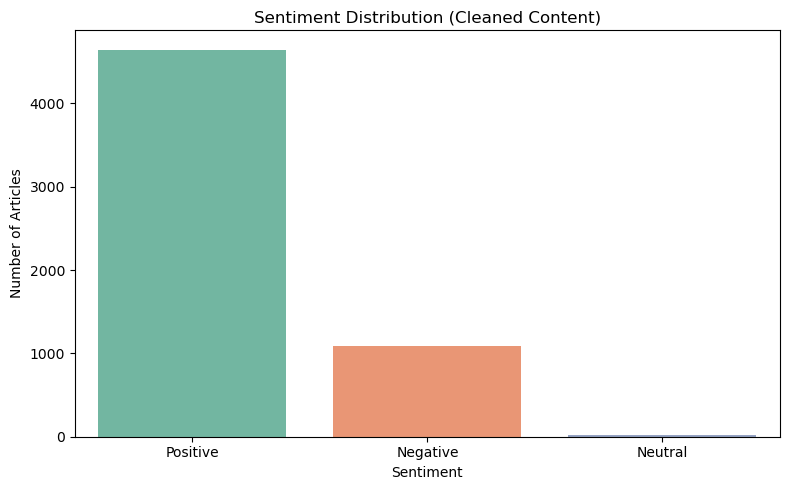

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Cleaned Sentiment', data=df, hue='Cleaned Sentiment', palette='Set2', legend=False)
plt.title("Sentiment Distribution (Cleaned Content)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()


# Polarity Score Distribution
# Plot Type: Histogram / KDE

# Column(s): Polarity Score, Cleaned Polarity

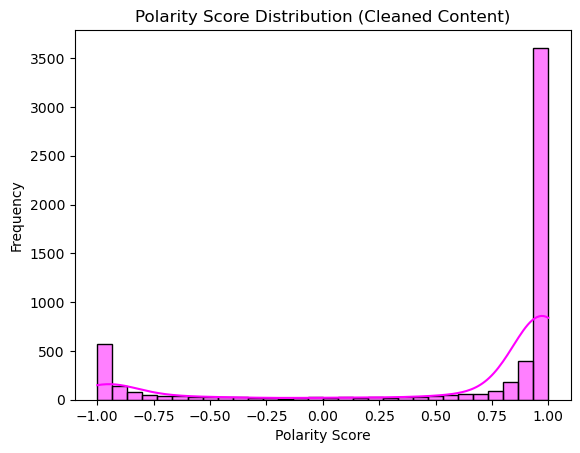

In [121]:
sns.histplot(df["Cleaned Polarity"], bins=30, kde=True, color='magenta')
plt.title("Polarity Score Distribution (Cleaned Content)")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()


 # Publication Date vs Sentiment
# Plot Type: Line plot or bar plot (time series trend)

# Column(s): Published Date, Cleaned Sentiment


# Prep: Convert Published Date to datetime, group by date and sentimen

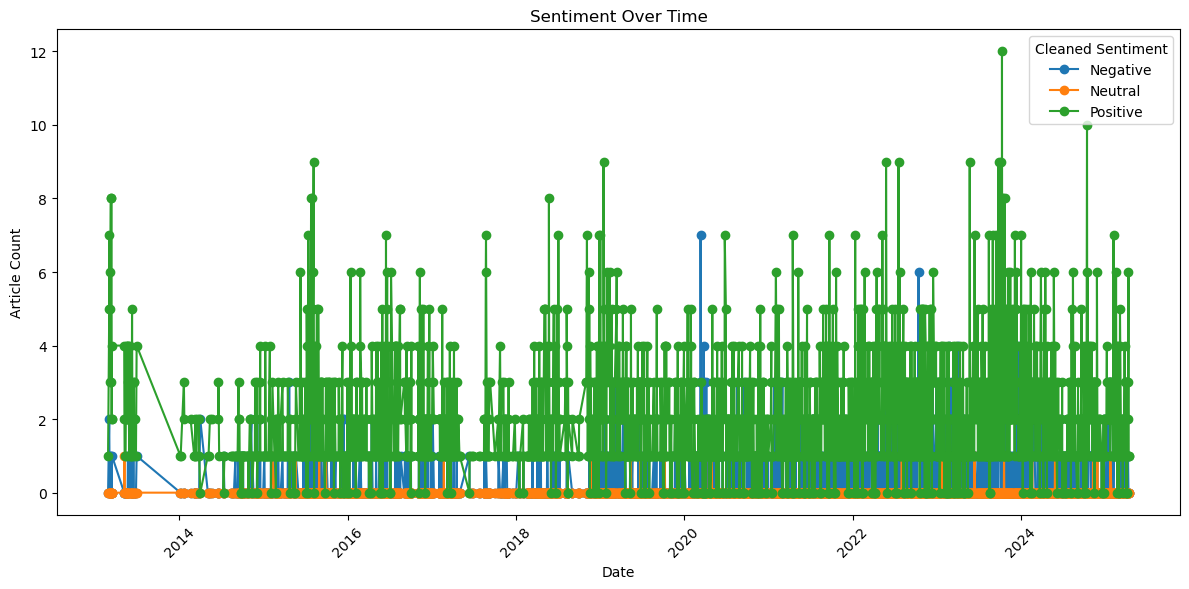

In [123]:
df["Published Date"] = pd.to_datetime(df["Published Date"], errors="coerce")
sentiment_over_time = df.groupby([df["Published Date"].dt.date, "Cleaned Sentiment"]).size().unstack().fillna(0)

sentiment_over_time.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Average Polarity by Author 
## Plot Type: Bar chart

## Column(s): Group by Author and average Cleaned Polarity

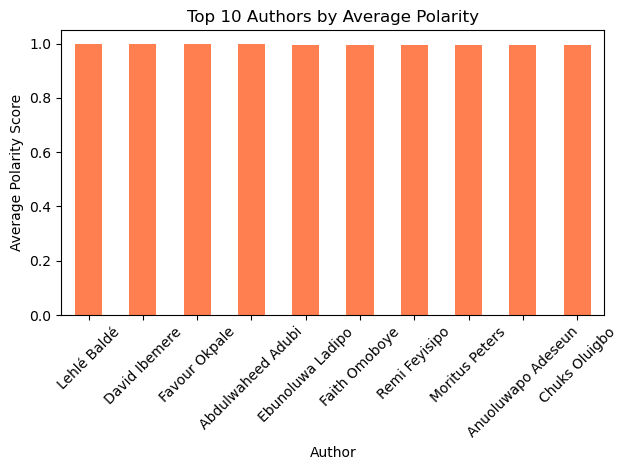

In [130]:
avg_polarity_by_author = df.groupby("Author")["Cleaned Polarity"].mean().nlargest(10)
avg_polarity_by_author.plot(kind='bar', color='coral')
plt.title("Top 10 Authors by Average Polarity")
plt.ylabel("Average Polarity Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top Authors by Article Count
## Plot Type: Horizontal bar chart

## Column(s): Author

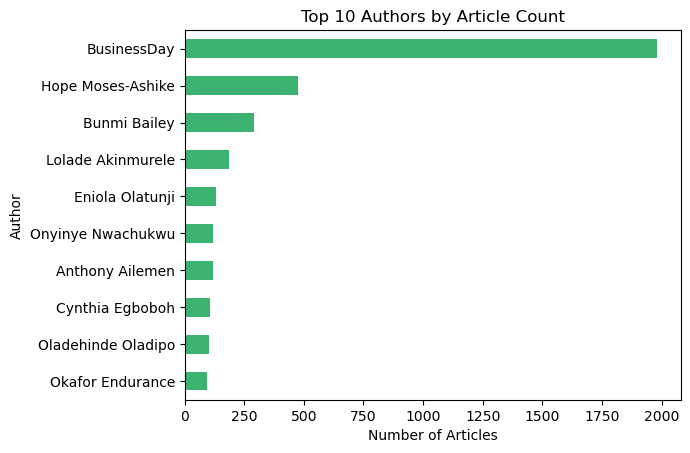

In [132]:
top_authors = df["Author"].value_counts().nlargest(10)
top_authors.plot(kind='barh', color='mediumseagreen')
plt.title("Top 10 Authors by Article Count")
plt.xlabel("Number of Articles")
plt.ylabel("Author")
plt.gca().invert_yaxis()
plt.show()


## Comparing sentiment before and after perprocessing

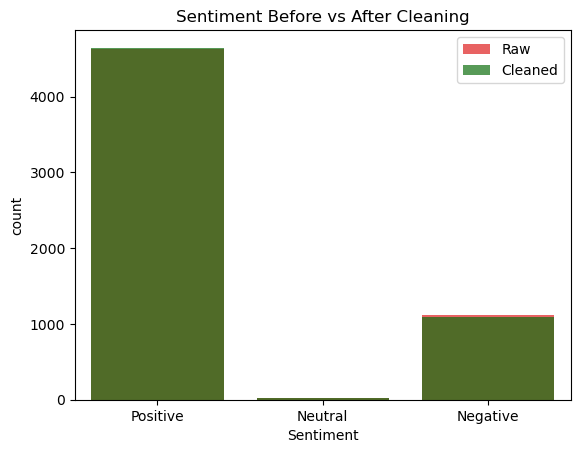

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare original vs cleaned sentiment distribution
sns.countplot(data=df, x="Sentiment", label="Raw", color="red", alpha=0.7)
sns.countplot(data=df, x="Cleaned Sentiment", label="Cleaned", color="green", alpha=0.7)
plt.title("Sentiment Before vs After Cleaning")
plt.legend()
plt.show()


## Sentiment Heatmap by Month/Week
## Filter Articles from 2021 Onward



# Word Cloud of Keywords
# Plot Type: Word cloud

# Column(s): Keywords or Cleaned Content

# Tool: wordcloud

In [153]:
# Convert 'Published Date' to datetime if not already
df["Published Date"] = pd.to_datetime(df["Published Date"], errors="coerce")

# Filter for articles from 2021 onwards
df_recent = df[df["Published Date"].dt.year >= 2021].copy()

# Optional: Create 'Month' column for grouping (e.g., "2023-04")
df_recent["Month"] = df_recent["Published Date"].dt.to_period("M").astype(str)


C:\Users\Gracious\AppData\Local\Temp\ipykernel_51468\2569098121.py:11: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Gracious\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


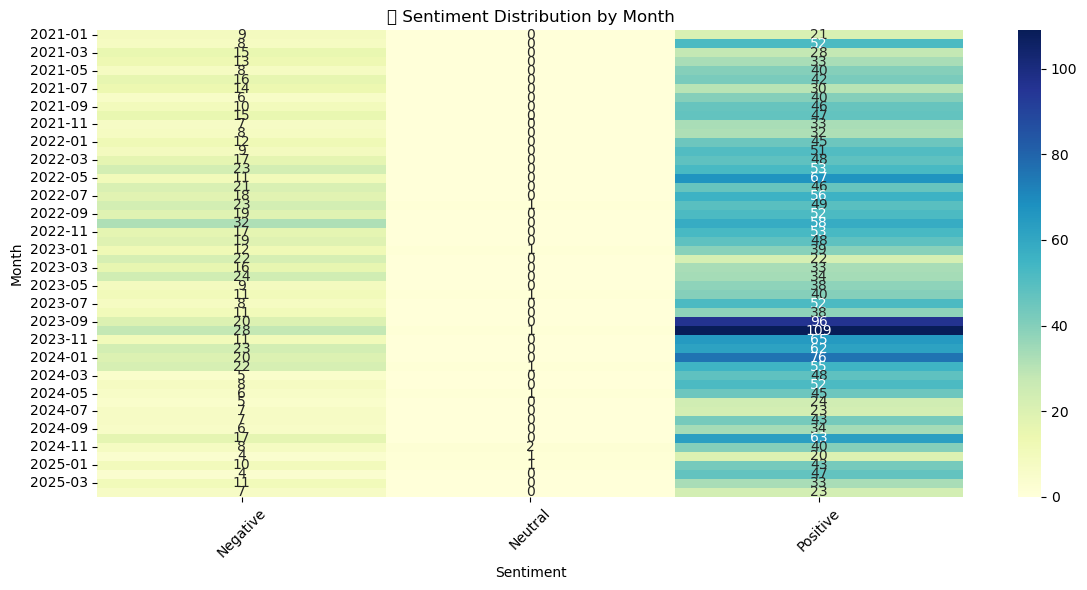

In [155]:
# Crosstab of sentiment per month
sentiment_heatmap = pd.crosstab(df_recent["Month"], df_recent["Cleaned Sentiment"])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_heatmap, annot=True, fmt="d", cmap="YlGnBu")
plt.title("🗓️ Sentiment Distribution by Month")
plt.xlabel("Sentiment")
plt.ylabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
!pip install wordcloud


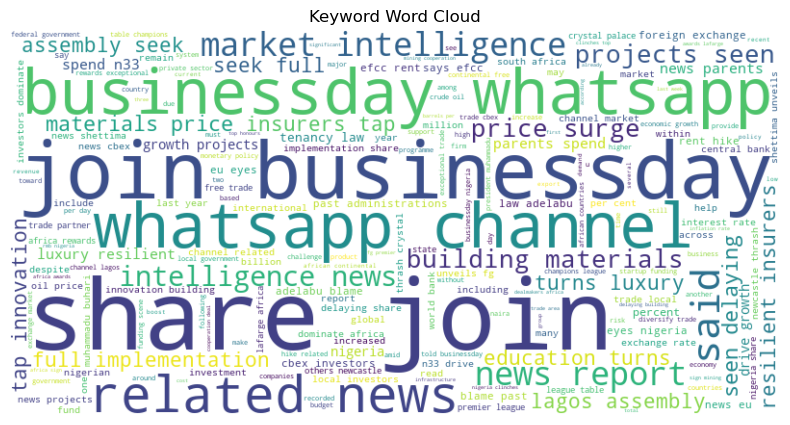

In [125]:
from wordcloud import WordCloud

text_blob = " ".join(df["Keywords"].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()
